 # Titanic, náufragos em dados.
 ---

 O RMS Titanic foi um navio de passageiros britânico projetado para ser o mais luxuoso e mais seguro de sua época. Sua viagem inaugural partiu de Southampton e, passando pelas cidades de Cherbourg e Queenstown, tinha New York como destino final. Após a colisão com um iceberg em 14 de abril de 1912, o navio afundou no dia seguinte e causou a morte de 1502 das 2224 pessoas a bordo.

O naufrágio do Titanic levou a comunidade internacional a discutir leis de navegação mais rígidas e tornou-se um dos mais famosos da história. Entre os principais motivos para as dimensões da tragédia, destacam-se as deficiências nos procedimentos de evacuação e a insuficiência de botes salva-vidas. Porém, sobreviver nesse cenário pode não ter sido questão de pura sorte e, por isso, a análise a seguir investigará se alguns grupos de indivíduos estavam mais propensos a sobreviver do que outros.


## Bibliotecas e Dados
---

Para a realização da presente análise, serão utilizadas as bibliotecas **Pandas**, **Seaborn** e **Matplotlib**. Todas as visualizações de dados produzidas serão dispostas nesse mesmo documento e os números reais serão exibidos com precisão de duas casas decimais para melhor compreensão dos mesmos. 

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

%matplotlib inline

pd.options.display.float_format = \
    lambda x : '{:.0f}'.format(x) if round(x,0) == x else '{:,.2f}'.format(x)

Serão utilizados dados referentes a 891 dos 2224 passageiros do RMS Titanic. Essa base de dados foi modificada e preparada previamente para melhor compreensão e adequação ao português, mas sua versão original pode ser obtida [aqui](https://www.kaggle.com/c/titanic).

In [57]:
data = pd.read_csv("../data/titanic_data.csv")
data["ID"].count()

891

A base de dados possui não somente informações demográficas de cada passageiro, mas também se o mesmo sobreviveu ao naufrágio, bem como informações sobre sua passagem e estadia no navio. A seguir, uma descrição mais detalhada de cada uma das colunas.

   ---
   - **ID:** Identificador único do passageiro.
   - **Passagem:** Identificador único da passagem adquirida.
   ---
   - **Idade:** Idade, em anos, do passageiro.
   - **Nome:** Nome completo, com pronome de tratamento incluso.
   - **Irmãos e Cônjuges:** Número de irmãos e/ou cônjuges também a bordo.
   - **Pais e Filhos:** Número de ascendentes e/ou descendentes diretos a bordo.
   - **Sobrevivente:** Booleano indicativo da sobrevivência do passageiro ao naufrágio.
   ---
   - **Cabine:** Cabine destinada ao passageiro.
   - **Tarifa:** Tarifa de embarque paga pelo passageiro.
   - **Classe:** Classe da passagem adquirida pelo passageiro (1ª, 2ª ou 3ª).
   - **Local de Embarque:** Cidade em que o passageiro embarcou no navio (Southampton, Cherbourg ou Queenstown).
   ---

In [58]:
data.head()

,ID,Nome,Idade,Sexo,Sobrevivente,Pais e Filhos,Irmãos e Cônjuges,Classe,Passagem,Local de Embarque,Tarifa,Cabine
0,1,Mr. Owen Harris Braund,22,Masculino,False,0,1,3ª,A/5 21171,Southampton,7.25,NaN
1,2,Mrs. John Bradley (Florence Briggs Thayer) Cum...,38,Feminino,True,0,1,1ª,PC 17599,Cherbourg,71.28,C85
2,3,Miss. Laina Heikkinen,26,Feminino,True,0,0,3ª,STON/O2. 3101282,Southampton,7.92,NaN
3,4,Mrs. Jacques Heath (Lily May Peel) Futrelle,35,Feminino,True,0,1,1ª,113803,Southampton,53.10,C123
4,5,Mr. William Henry Allen,35,Masculino,False,0,0,3ª,373450,Southampton,8.05,NaN


## Preparação para Análise
---

As colunas **ID**, **Cabine** e **Passagem** não contém dados de interesse para a presente análise e, portanto, serão removidas do *dataframe* para apresentação mais sucinta dos dados.

In [59]:
data = data.drop(["ID", "Cabine", "Passagem"], axis = 1)

A seguir, o código das funções produzidas para utilização na análise:

In [73]:
def get_relative_frequency(dataframe, column_label):
    """
    Calcula e retorna a frequência relativa para os valores a ocorrerem em uma
    coluna específica do dataframe.
    """
    return dataframe[column_label].value_counts(normalize = True)
    
def get_numeric_statistics(dataframe, column_label):
    """
    Calcula e retorna a média, a mediana, o mínimo, o máximo e o desvio padrão
    de uma coluna específica do dataframe. Naturalmente, a coluna deve conter
    valores numéricos.
    """
    return pd.Series({"Mean": dataframe[column_label].mean(),
                      "Median:": dataframe[column_label].median(),
                      "Minimum": dataframe[column_label].min(),
                      "Maximum": dataframe[column_label].max(),
                      "Standard Deviation:": dataframe[column_label].std()})

def create_numeric_value_column(dataframe, original_label, new_label):
    """
    Mapeia os valores categóricos de uma coluna do dataframe para novos valores,
    desta vez numéricos, que serão inseridos nesse mesmo dataframe em uma coluna,
    cujo label é indicado como parâmetro.
    """
    categories = dataframe[original_label].sort_values().unique().tolist()
    new_values = []
    
    for value in dataframe[original_label]:
        new_values.append(categories.index(value))
    
    dataframe[new_label] = pd.Series(new_values)
    
def get_correlations_of(target_label, dataframe, column_labels):
    """
    Calcula e retorna as correlações de uma coluna-alvo do dataframe com cada
    uma das colunas (desse mesmo dataframe) indicadas em uma lista. Todas as
    colunas utilizadas nessa função devem conter valores numéricos.
    """
    correlations = {}
    for label in column_labels:
        correlations[label] = dataframe[target_label].corr(dataframe[label])
    return pd.Series(correlations).sort_values()

## Conhecendo os Náufragos
---

Antes de iniciar a busca por fatores que tenham favorecido a sobrevivência de determinados grupos de passageiros do RMS Titanic, decidiu-se conhecer melhor a amostra e suas particularidades através do levantamento de algumas estatísticas.

In [61]:
get_relative_frequency(data, "Sobrevivente")

False   0.62
True    0.38
Name: Sobrevivente, dtype: float64

In [62]:
get_relative_frequency(data, "Sexo")

Masculino   0.65
Feminino    0.35
Name: Sexo, dtype: float64

In [63]:
get_relative_frequency(data, "Classe")

3ª   0.55
1ª   0.24
2ª   0.21
Name: Classe, dtype: float64

In [64]:
get_numeric_statistics(data, "Idade")

Mean                  29.70
Median:                  28
Minimum                0.42
Maximum                  80
Standard Deviation:   14.53
dtype: float64

Considerando os 891 passageiros descritos na base de dados, apenas 38% sobreviveram ao naufrágio. Além disso, 65% desses passageiros são do sexo masculino e, apenas, 35% do sexo feminino. A desigualdade dessa proporção é compreensível, visto que a viagem ocorreu no início do século XX, época em que as mulheres tinham sua liberdade (ainda mais) cerceada por uma sociedade fortemente machista.

A maioria absoluta dos passageiros viajavam pela 3ª classe, algo esperado quando se considera os custos inferiores das passagens dessa classe. No entanto, destoando da expectativa, o número de passageiros viajando pela 1ª classe supera o número daqueles viajando pela 2ª classe. Ainda, a idade média da amostra é de cerca de 30 anos, porém, entre os passageiros estão inclusos desde bebês de colo até idosos.

Para melhor compreensão da distribuição de idades nessa amostra, plotou-se o histograma apresentado a seguir. É perceptível uma forte concentração de idades entre 20 e 40 anos. Para valores superiores a esse intervalo, a concentração decaí proporcionalmente ao distanciamento do mesmo, já para valores inferiores ao intervalo, ocorre o inverso.

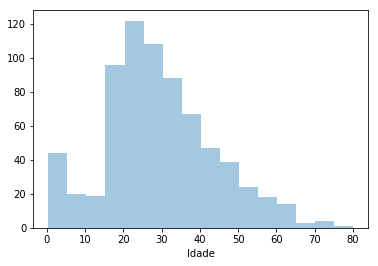

In [65]:
sns.distplot(data["Idade"].dropna(), bins = 16, kde = False)

## Quem tem mais chances de sobreviver?
---

A correlação é uma medida estatística cujo valor é capaz de fornecer indícios sobre a existência (ou ausência) de relações entre duas variáveis quantitativas distintas. Visando utilizá-la como indicador único, realizou-se o mapeamento das variáveis **Sexo** e **Classe** para valores numéricos inteiros que foram adicionados ao *dataframe* em novas colunas nomeadas com o *label* original acrescido de "(N)".

Visto que o **Local de Embarque** não é uma variável qualitativa ordinal, tampouco é possível mapeá-la para valores binários, não foi alvo de mapeamento para evitar uma possível inserção de viés no cálculo das correlações. Ainda, destaca-se que o uso de Python tornou o mapeamento da variável **Sobrevivente** desnecessário, uma vez que  booleanos serão tratados como inteiros (False = 0 e True = 1) automaticamente. 

In [66]:
create_numeric_value_column(data, "Sexo", "Sexo (N)")
create_numeric_value_column(data, "Classe", "Classe (N)")

data.head(10)

,Nome,Idade,Sexo,Sobrevivente,Pais e Filhos,Irmãos e Cônjuges,Classe,Local de Embarque,Tarifa,Sexo (N),Classe (N)
0,Mr. Owen Harris Braund,22,Masculino,False,0,1,3ª,Southampton,7.25,1,2
1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,38,Feminino,True,0,1,1ª,Cherbourg,71.28,0,0
2,Miss. Laina Heikkinen,26,Feminino,True,0,0,3ª,Southampton,7.92,0,2
3,Mrs. Jacques Heath (Lily May Peel) Futrelle,35,Feminino,True,0,1,1ª,Southampton,53.10,0,0
4,Mr. William Henry Allen,35,Masculino,False,0,0,3ª,Southampton,8.05,1,2
5,Mr. James Moran,nan,Masculino,False,0,0,3ª,Queenstown,8.46,1,2
6,Mr. Timothy J McCarthy,54,Masculino,False,0,0,1ª,Southampton,51.86,1,0
7,Master. Gosta Leonard Palsson,2,Masculino,False,1,3,3ª,Southampton,21.07,1,2
8,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,27,Feminino,True,2,0,3ª,Southampton,11.13,0,2
9,Mrs. Nicholas (Adele Achem) Nasser,14,Feminino,True,0,1,2ª,Cherbourg,30.07,0,1


Com o mapeamento concluído, buscou-se conhecer a correlação da sobrevivência do passageiro com diversas outras variáveis conhecidas, sendo elas: a idade e o sexo do indivíduo, a classe pela qual estava viajando, o valor pago como tarifa de embarque e o número de familiares que o mesmo tinha à bordo do navio.

Conhecendo os coeficientes de correlação de Pearson, os absolutos dos valores obtidos indicam que a sobrevivência do passageiro está fracamente correlacionada à sua classe de viagem (entre 0.3 e 0.5) e moderadamente correlacionada ao seu sexo (entre 0.5 e 0.7), enquanto os demais valores indicam correlações desprezíveis.

In [74]:
labels = ["Idade", "Irmãos e Cônjuges", "Pais e Filhos", "Tarifa", "Sexo (N)", "Classe (N)"]

get_correlations_of("Sobrevivente", data, labels)

Sexo (N)            -0.54
Classe (N)          -0.34
Idade               -0.08
Irmãos e Cônjuges   -0.04
Pais e Filhos        0.08
Tarifa               0.26
dtype: float64

Para compreender melhor a relação entre a classe de viagem e a sobrevivência do passageiro, plotou-se o gráfico de barras abaixo. É notável que na 1ª classe o número de sobreviventes supera consideravelmente o número de mortos, enquanto na 3ª classe o número de mortos é maior que o triplo do número de sobreviventes. Além disso, o número de mortos e de sobreviventes é muito semelhante na 2ª classe. 

Esses números nos levam a supor que a classe de viagem de um passageiro e, consequentemente, seu poder aquisitivo podem ter sido determinantes em sua sobrevivência. É muito provável que, durante a evacuação do navio, os passageiros da 1ª classe tenham tido acesso mais fácil aos botes salva-vidas ou, até mesmo, tenham sido priorizados na ocupação desses.

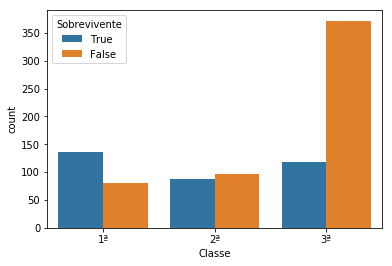

In [68]:
sns.countplot(x = "Classe", hue = "Sobrevivente", data = data.sort_values("Classe"), hue_order = (True, False))

De maneira análoga, plotou-se o gráfico de barras abaixo para compreender melhor a relação entre o sexo e a sobrevivência dos passageiros. Nota-se que, enquanto cerca de 75% das mulheres sobreviveram ao naufrágio, menos de 20% dos homens sobreviveram. Assim, além de perceber que o sexo foi um fator importante para a sobrevivência dos passageiros, somos levados a supor que as mulheres foram priorizadas na ocupação dos botes salva-vidas.

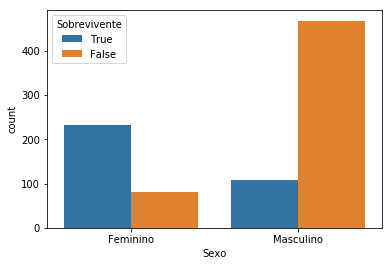

In [69]:
sns.countplot(x = "Sexo", hue = "Sobrevivente", data = data.sort_values("Sexo"), hue_order = (True, False))

Por fim, usando a mesma estratégia, investigou-se a relação entre a sobrevivência do passageiro e seu local de embarque. O porto da de Cherbourg foi o único dos três que gerou mais passageiros sobreviventes do que falecidos. Enquanto isso, o porto de Southampton teve apenas cerca de 1/3 dos passageiros sobrevivendo ao naufrágio. Essa desigualdade tão notável pode estar relacionada à posição das acomodações dos passageiros no navio de acordo com seu local de embarque, mas não há dados disponíveis para corroborar essa teoria.

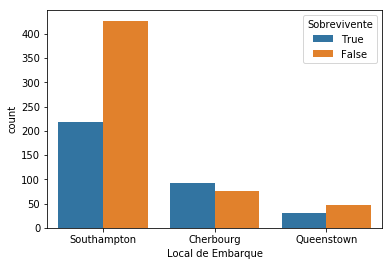

In [70]:
sns.countplot(x = "Local de Embarque", hue = "Sobrevivente", data = data, hue_order = (True, False))

## Conclusões
---

As análises realizadas levantaram indícios de que o sexo, a classe de viagem e o local de embarque dos passageiros estão relacionados à sobrevivência dos mesmos. No entanto, é importante ressaltar que a existência de correlação entre as variáveis investigadas não determina causalidade entre elas. Dessa forma, são necessárias novas investigações e uso de outras técnicas para determinar se ser uma mulher embarcando em Cherbourgh para uma viagem de 1ª classe no RMS Titanic é realmente suficiente para sobreviver ao naufrágio da embarcação.